In [2]:
import numpy as np
from PIL import Image, ImageDraw
import cv2

(1080, 1440)


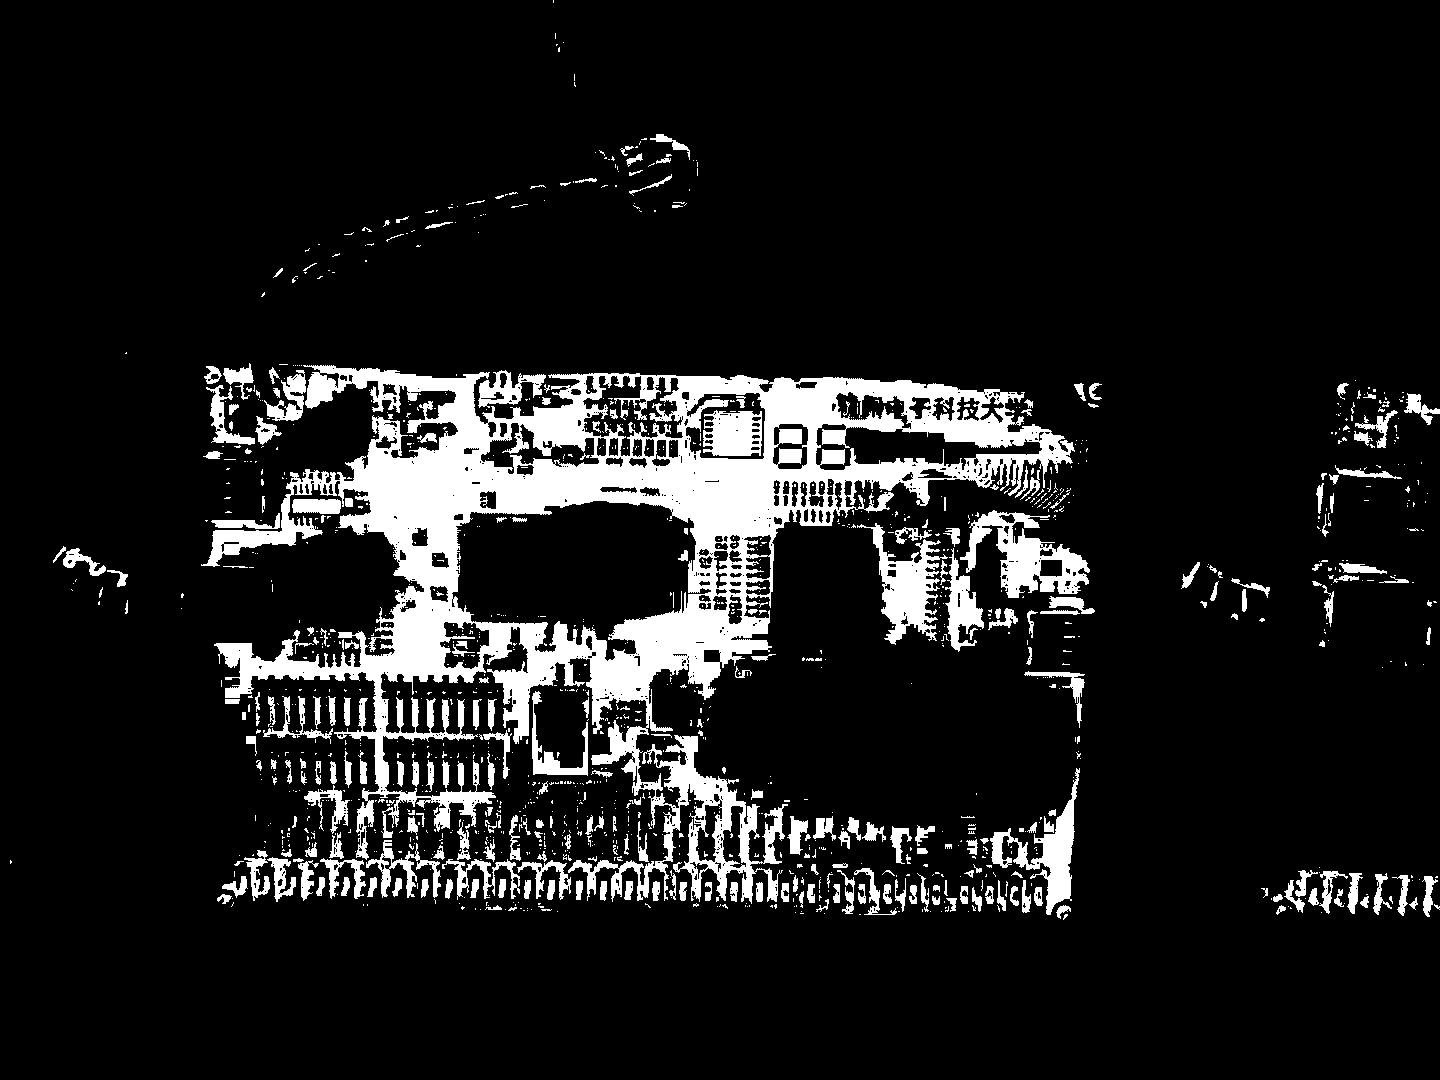

In [14]:
raw = cv2.imread('raw.jpg')

# 需要提取的颜色范围
low = np.array([6, 160, 0])
hig = np.array([40, 255, 200])

# 转换为 H S V 色彩空间
hsv = cv2.cvtColor(raw, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, low, hig)
print(mask.shape)
Image.fromarray(mask)

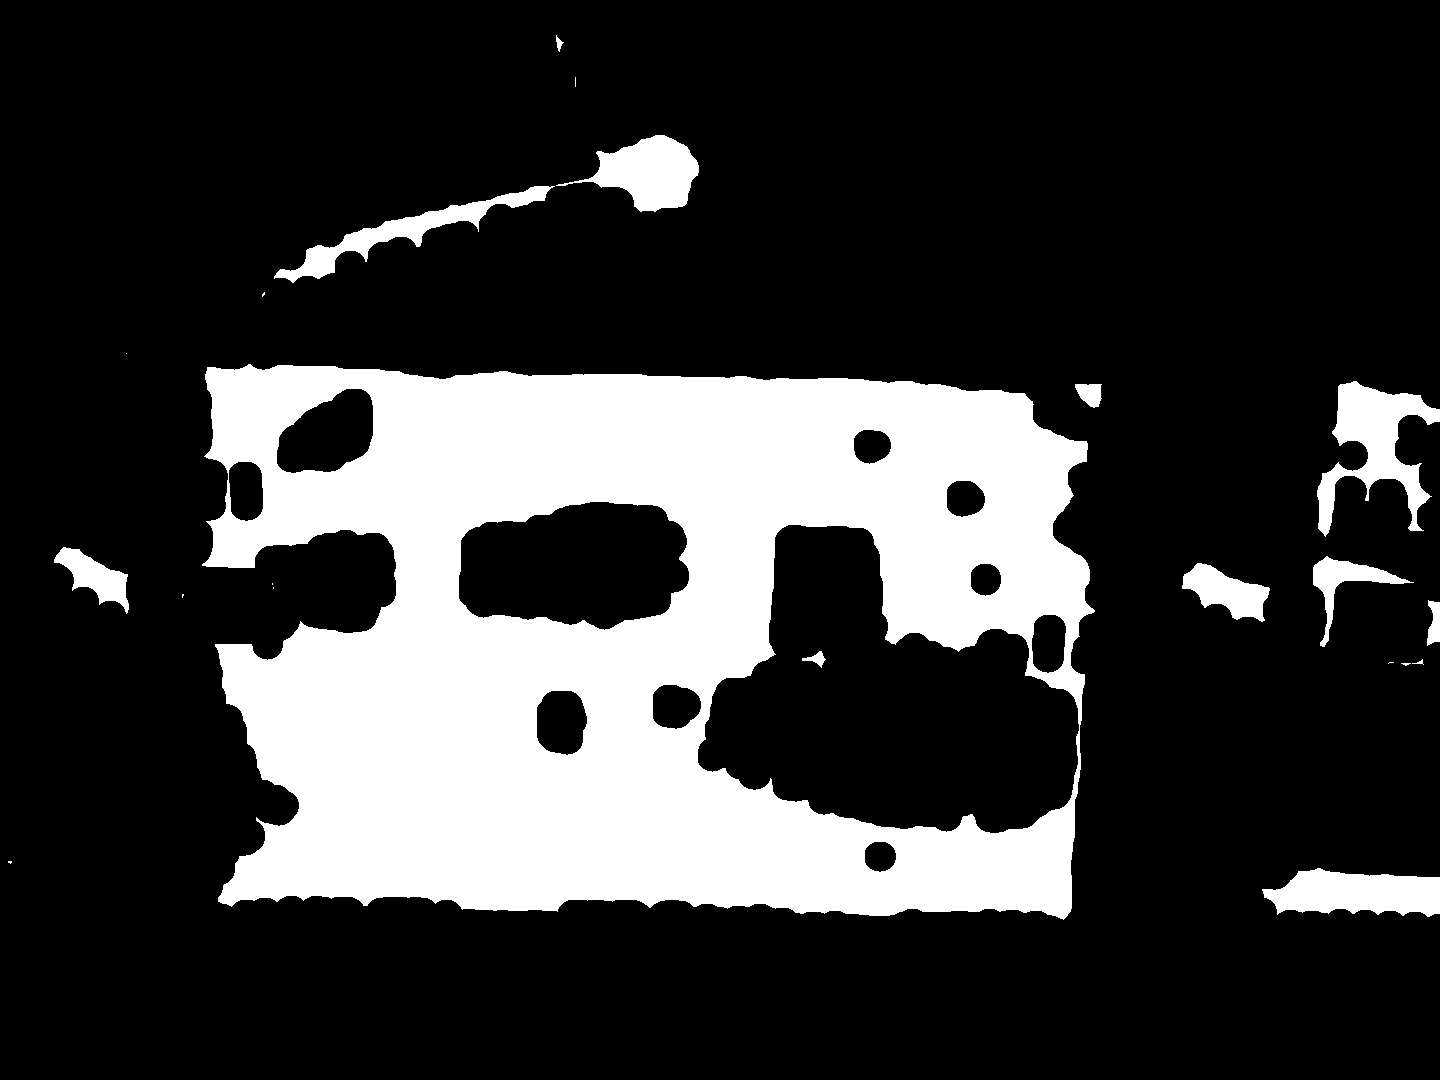

In [4]:
# 大概是 向内膨胀的操作
# 参考自 https://blog.csdn.net/sinat_36458870/article/details/78825571
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closed)

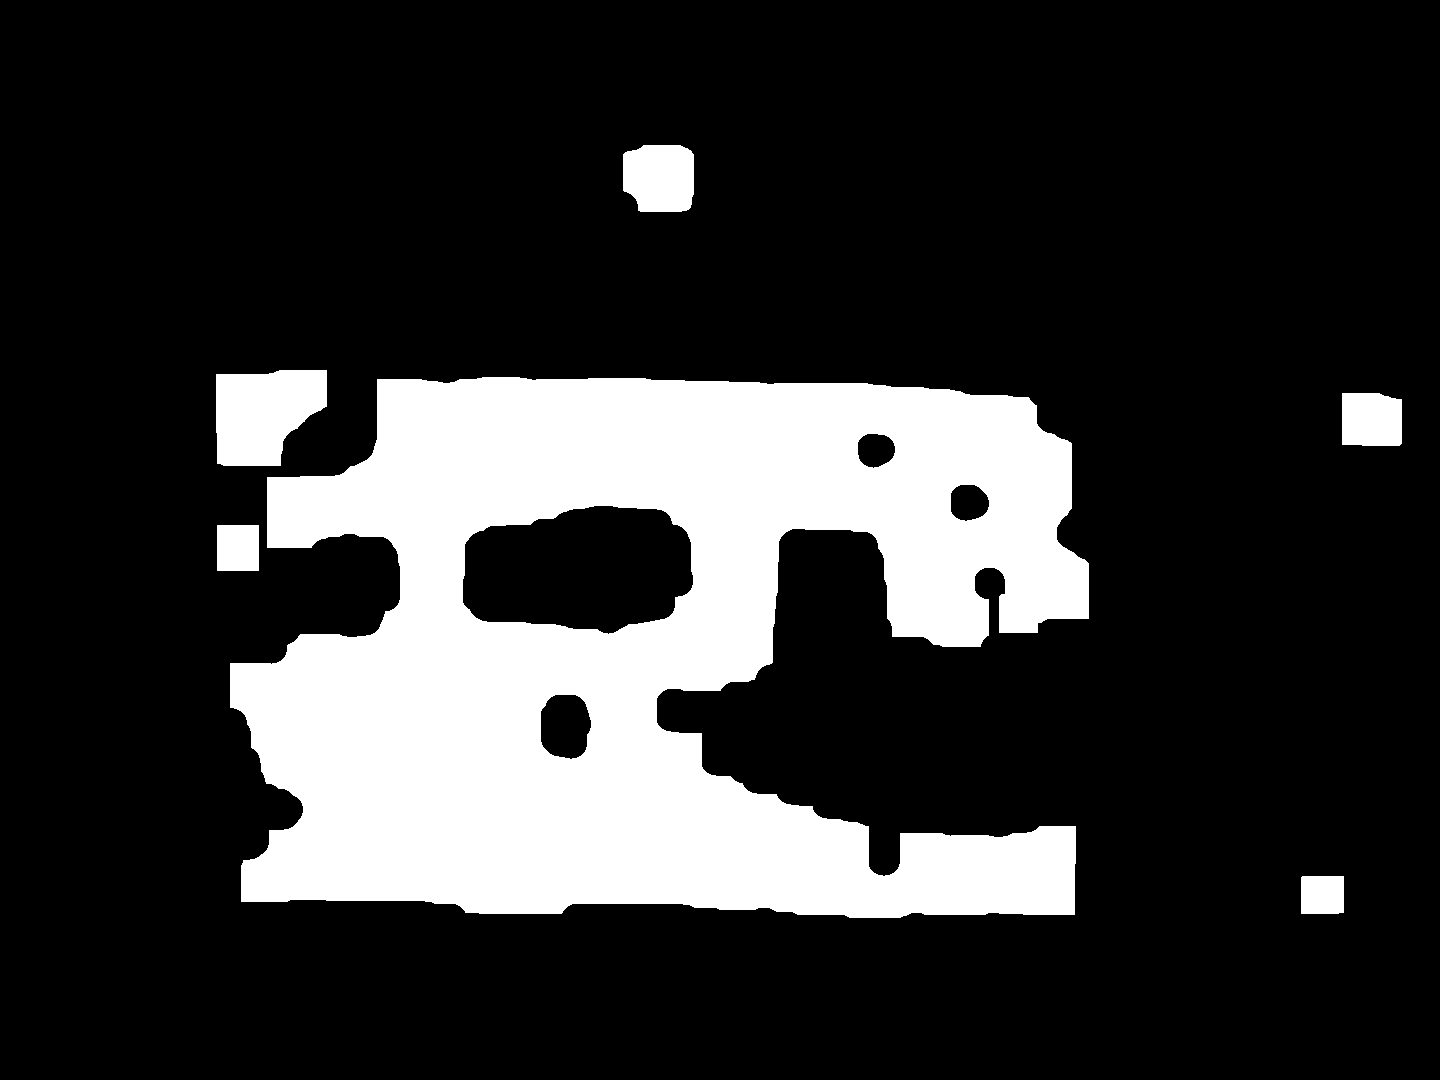

In [6]:
# 腐蚀膨胀降噪
kernel = np.ones((10,10),np.uint8)
e = cv2.erode(closed, kernel, iterations=4)
d = cv2.dilate(e, kernel, iterations=4)
Image.fromarray(d)

10
[1549.0, 1845.0, 2959.5, 309636.5, 2745.0, 23872.0, 1164.0, 1052.5, 8208.0, 4177.0]
3


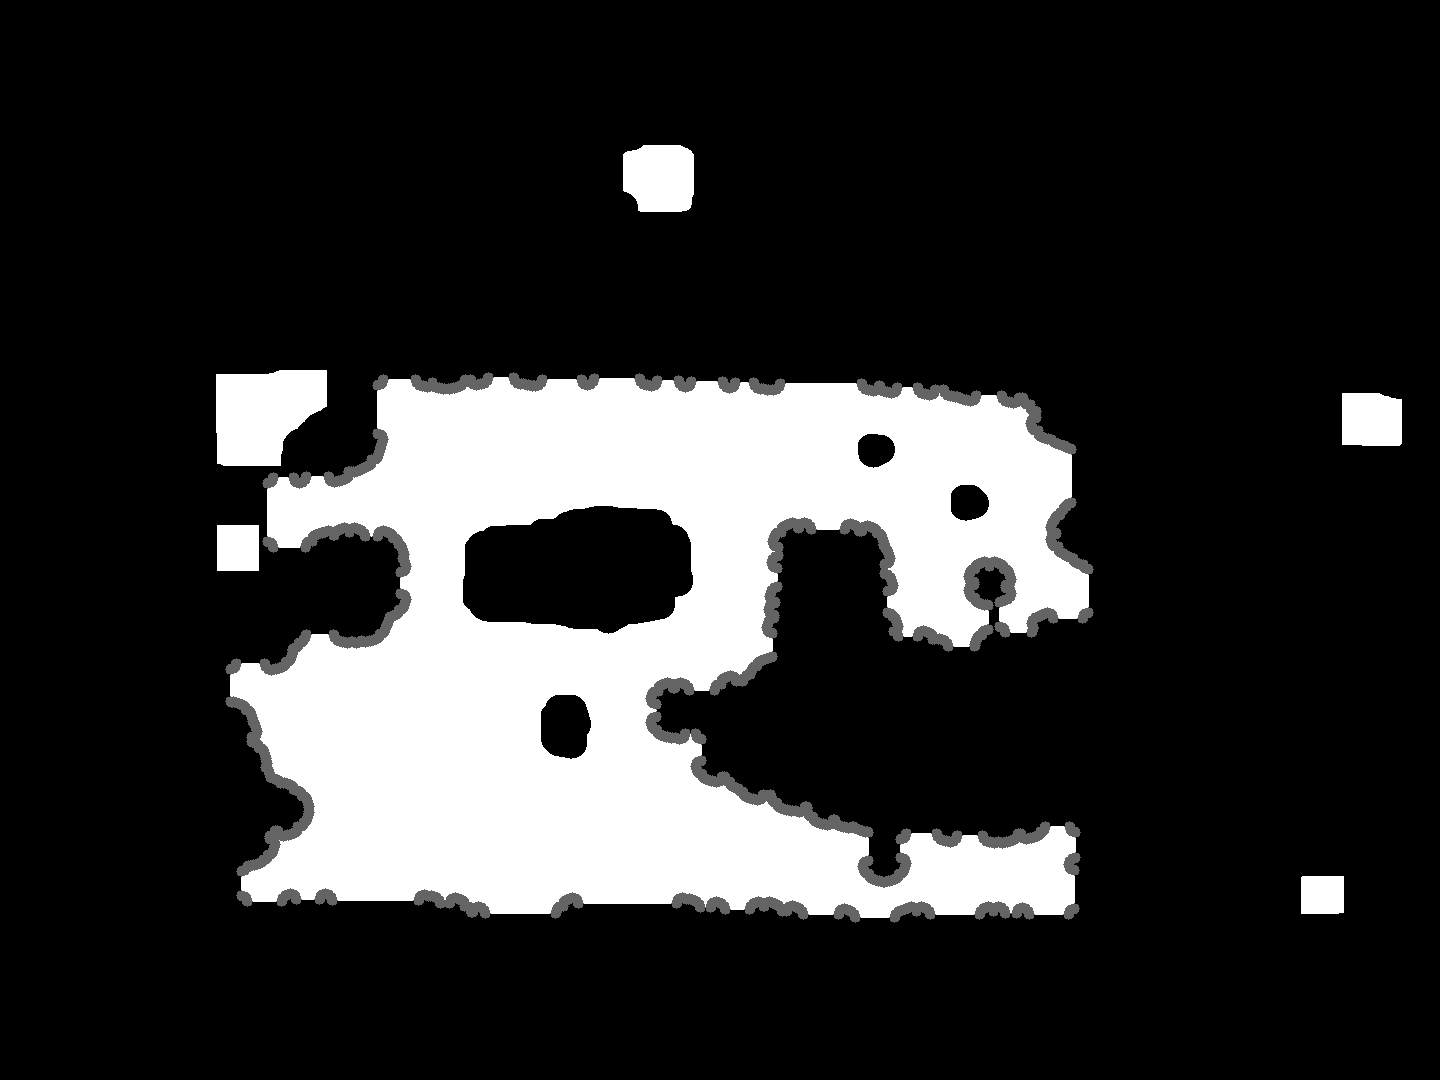

In [8]:
# 找出最大的连通区
_, d = cv2.threshold(d, 230, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(d,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
l=list(map(lambda x:cv2.contourArea(x),contours))
print(l)
max_id=np.argmax(l)
print(max_id)
max_con= contours[max_id]

# 画出边界
cv2.drawContours(d,max_con,-1,(100),10) 
Image.fromarray(d)

(1080, 1440, 3)
(540, 858, 3)


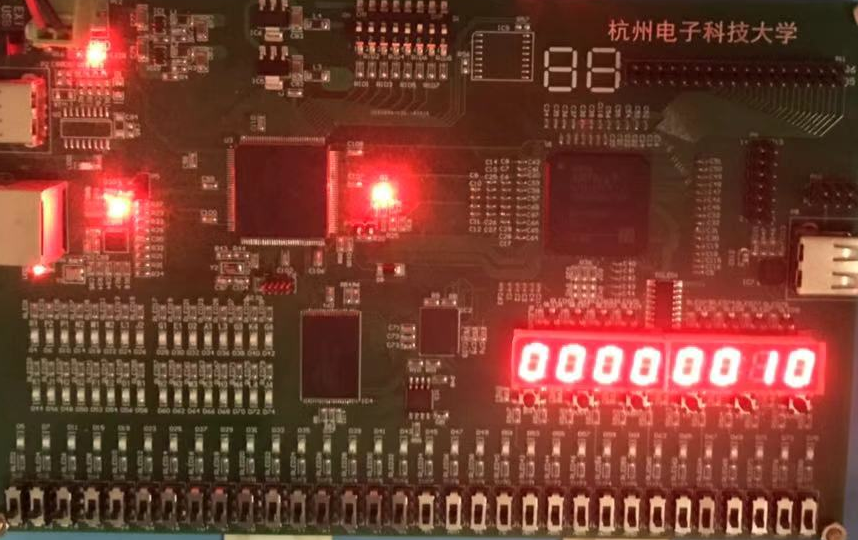

In [9]:
# 获取最大连通区的两个坐标轴上的值，两个列表
max_con=max_con.reshape(-1,2)
col=max_con[:,0]
row=max_con[:,1]
print(raw.shape)

raw = cv2.imread('raw.jpg')
raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
# 利用两个列表的最大最小值得到矩形边界，即电路板的位置，并从原图上截下
card=raw[min(row):max(row), min(col):max(col)]
print(card.shape)
Image.fromarray(card)

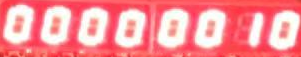

In [10]:
(h,w)=card.shape[:2]
# 手动调整数字区域的位置
digit_area=card[round(h*5/8):round(h*3/4-10),round(w*3/5):round(w*15/16+12)]
Image.fromarray(digit_area)

In [ ]:
# 之后进行均匀切割，将8个区域送入模型进行识别